# Challenge 4: Nested dictionaries

Next week we will deal with web scraping and API's. Python wise this means since we will encounter file formats like JSON we will have to deal with a lot of dictionaries. Not only ordinary dictionaries, but also nested ones. In this lab we will train handling them.

In the following, if we show values with markdown, just copy-paste them into your `# my code here` field if you need them.

**Warm up phase: Here are some keys and values. Use them to build a dictionary called `numbers_dct`**

```python
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
```

In [4]:
# your code here
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]

numbers_dct = {}
currentIndex=0
for newKey in keys:
    numbers_dct[newKey] = values[currentIndex]
    currentIndex += 1
    
numbers_dct

{'hundred': 10, 'twohundred': 20, 'threehundred': 30}

**Here are two dictionaries. Merge their entries to a third dictionary**

```python
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
```

In [7]:
# your code here
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
dict3 = {}

for newKey, newValue in dict1.items():
    dict3[newKey] = newValue


for newKey, newValue in dict2.items():
    dict3[newKey] = newValue

dict3

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

**Nested dictionaries**

Here comes a bigger, nested dictionary. Store Martin's French grades in a variable called `martins_french` by navigating to the value using keys and values. Remember, while you drill down the structure of the dictionary and you encounter a new dictionary, you can always use `.keys()` and `.values()` to not loose orientation.

In [10]:
sampleDict = {
    "class":{
        "student_list":{
            "Anna":{
                "marks":{
                    "physics":[70, 20, 100, 20],
                    "history":[80,10,55,35],
                    "math":[100, 90, 70, 35],
                }
            },
            "Martin":{
                "marks":{
                    "french":[20, 10, 35, 45],
                    "spanish":[40, 75, 50, 90],
                    "math": [90,85, 90, 95],
                }
            },
            "Richard":{
                "marks":{
                    "physics":[10, 10, 0, 90],
                    "biology":[50, 50, 70, 75],
                    "math":[90, 70, 50, 40],
                }
            }
        }
    }
}

In [17]:
# your code here
print(str(sampleDict["class"]['student_list']['Martin']['marks']['french']))

[20, 10, 35, 45]


**Calculate the mean of Richard's biology's grades**

In [21]:
# your code here
import numpy
numpy.mean(sampleDict["class"]['student_list']['Richard']['marks']['biology'])

61.25

**Return a list of all the students**

In [25]:
# your code here
names = []
for name in sampleDict["class"]['student_list'].keys():
    names.append(name)
print(str(names))

['Anna', 'Martin', 'Richard']


**Return Anna's 2nd grade in history**

In [26]:
sampleDict["class"]['student_list']['Anna']['marks']['history'][1]

10

**Return all the grades that are 3rd in the list for every subject for all the students**

Use appropriate `for` loops and a `print()` statement

In [34]:
for student in sampleDict["class"]['student_list'].keys():
    print(student + "had the following grades in each third test")
    for theClass in sampleDict["class"]['student_list'][student]['marks'].keys():
        print("In " + theClass + " it was " + str(sampleDict["class"]['student_list'][student]['marks'][theClass][2]))             


Annahad the following grades in each third test
In physics it was 100
In history it was 55
In math it was 70
Martinhad the following grades in each third test
In french it was 35
In spanish it was 50
In math it was 90
Richardhad the following grades in each third test
In physics it was 0
In biology it was 70
In math it was 50


**Get all the grades and store them in a list `all_grades` Calculate the mean (solution: 55.97)**

You can of course use a modified version of your solution of the previous question.

In [35]:
# your code here
all_grades = []
for student in sampleDict["class"]['student_list'].keys():
    for theClass in sampleDict["class"]['student_list'][student]['marks'].keys():
        for theGrade in sampleDict["class"]['student_list'][student]['marks'][theClass]:
            all_grades.append(theGrade)
all_grades


55.97222222222222


In [100]:
print(numpy.mean(all_grades))

55.97222222222222

**Save that list as a column in a pandas dataframe and plot a histogram with it**

Text(0.5, 1.0, 'grades')

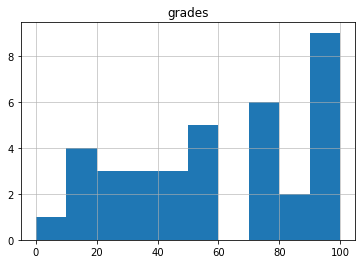

In [47]:
# your code here
import pandas as pd
import matplotlib.pyplot as plot
pandasDf = pd.DataFrame(all_grades, columns=['grades'])
plot.hist(pandasDf)
plot.grid(axis='y', alpha=0.75)
plot.grid(axis='x', alpha=0.75)
plot.title('grades')

Output should look like this

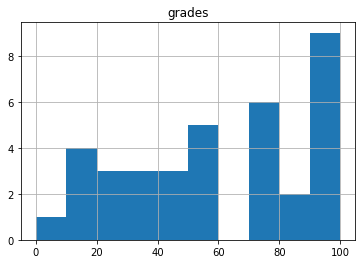

**Return all the students subjects. Watch out: We don't want repetitions!**

In [50]:
# your code
ClassList = []
for student in sampleDict["class"]['student_list'].keys():
    for theClass in sampleDict["class"]['student_list'][student]['marks'].keys():
        ClassList.append(theClass)
ClassSet = set(ClassList)
ClassSet


{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

Output should look like this

{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

**Richard heard you're a data enthusiast and asks you to hack the school server and and replace his worst physics grade rounded to full integers (0) with the mean of his physics grades (he doesn't want to raise suspicion). Help him do that. Check wether your hack was successful by printing his physics grade**

In [63]:
# your code here
meanPhysics = 0
import math

meanPhysics = numpy.mean(sampleDict["class"]['student_list']['Richard']['marks']['physics'])
worstGrade = 100
worstGradeIndex = 0
currentIndex = 0
for gradeToTest in sampleDict["class"]['student_list']['Richard']['marks']['physics']:
    if(math.ceil(gradeToTest))<=worstGrade:
        worstGradeIndex = currentIndex
        worstGrade = gradeToTest
    currentIndex += 1
sampleDict["class"]['student_list']['Richard']['marks']['physics'][worstGradeIndex] = math.ceil(meanPhysics)
print(str(sampleDict["class"]['student_list']['Richard']['marks']['physics']))

27.5
[10, 10, 28, 90]


**The hack was discovered! They found out it must have been Richard because his physics grade is not a multiple of 5 like all the other grades**

Expell Richard (poor Richard!) by removing him from the dictionary. Use `del`. And print the resulting class dictionary.

In [108]:
# your code here


{'class': {'student_list': {'Anna': {'marks': {'physics': [70, 20, 100, 20],
     'history': [80, 10, 55, 35],
     'math': [100, 90, 70, 35]}},
   'Martin': {'marks': {'french': [20, 10, 35, 45],
     'spanish': [40, 75, 50, 90],
     'math': [90, 85, 90, 95]}}}}}

In [66]:
del sampleDict["class"]['student_list']['Richard']
print(str(sampleDict))

{'class': {'student_list': {'Anna': {'marks': {'physics': [70, 20, 100, 20], 'history': [80, 10, 55, 35], 'math': [100, 90, 70, 35]}}, 'Martin': {'marks': {'french': [20, 10, 35, 45], 'spanish': [40, 75, 50, 90], 'math': [90, 85, 90, 95]}}}}}
